



# 기계학습 10주차 실습 자료
#### 조교 : 김도경




#1. sklean이란?
- Scikit-learn
- 머신러닝에 사용되는 지도/비지도 학습 알고리즘을 제공하는 파이썬 라이브러리
- Google Summer of Code 프로젝트로 2007년 시작 ~ January 2021. scikit-learn 0.24.1 버전까지 제공
- https://scikit-learn.org/stable/
- 이용 가이드
  - https://scikit-learn.org/stable/user_guide.html
- 예제
  - https://scikit-learn.org/stable/auto_examples/index.html
- gihub 
  - https://github.com/scikit-learn/scikit-learn



# 2. OR 데이터 인식
- OR 데이터에 퍼셉트론 적용

In [ ]:
from sklearn.linear_model import Perceptron

# 훈련 집합 구축

X = [[0,0],[0,1],[1,0],[1,1]]
y = [-1,1,1,1]
11
# fit 함수로 Perceptron 학습

p = Perceptron()
p.fit(X,y)

print('학습된 퍼셉트론의 매개변수: ', p.coef_,p.intercept_)
print('훈련집합에 대한 예측: ', p.predict(X))
print('정확률 측정: ', p.score(X,y)*100, "%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [19]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

# 훈련 집합
X = [[0,0], [0,1], [1,0], [1,1]]
y = [-1, 1, 1, 1]

# 퍼셉트론 학습
p = Perceptron()
p.fit(X, y)

print("학습된 퍼셉트론의 매개변수: ", p.coef_, p.intercept_)
print("훈련집합에 대한 예측: ", p.predict(X))
print(f"정확률 측정: {p.score(X, y) * 100} %")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정: 100.0 %


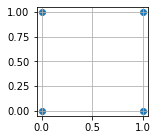

In [23]:
plt.figure(figsize=(2,2))
plt.scatter([x[0] for x in X], [y[1] for y in X])
plt.grid()
plt.show()

# 3. 필기 숫자 데이터 인식
## 3-1. sklearn이 제공하는 숫자 데이터에 퍼셉트론 적용
- Perceptron 파라메터 
  - max_iter : int, default=1000

    The maximum number of passes over the training data (aka epochs).
    It only impacts the behavior in the fit method, and not the
    partial_fit method.
  - verbose : int, default=0

    The verbosity level

  - eta0 : double, default=1

    Constant by which the updates are multiplied.

- 정확도 = 예측값결과와 실제값이 동일한 건수 / 전체 데이터수 

In [84]:
for i in tqdm(range(3)):
    print(i)

0
1
2



In [209]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import itertools
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings(action='ignore')

def data_splitter(dataset, train_size):
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size = train_size)
    return X_train, X_test, y_train, y_test

# hyper parameters
max_iters = [10, 50, 100, 300, 500]
etas = [0.1, 0.01, 0.001, 0.0001]
train_sizes = [0.6, 0.7, 0.8]

# load the data
digit = datasets.load_digits()

# splitted dataset
train_test_datas = [data_splitter(digit, train_size) for train_size in train_sizes]

# perceptrons by hyperparameters
perceptrons = [Perceptron(max_iter=max_iter, eta0=eta, verbose=0) for max_iter, eta in itertools.product(max_iters, etas)]

# fitting
fitted_perceptrons = [perceptron.fit(data[0], data[2]) for data, perceptron in tqdm(itertools.product(train_test_datas, perceptrons))]

# predicting
result = [perceptron.predict(data[1]) for data, perceptron in tqdm(itertools.product(train_test_datas, perceptrons))]

# confusion matrix
conf_list = []
res_len = []
## train_size: 0.6
for res in result[:20]:
    conf = np.zeros((10, 10))
    for i in range(len(res)):
        conf[res[i]][train_test_datas[0][3][i]] += 1
    conf_list.append(conf)
    res_len.append(len(res))
## train_size: 0.7    
for res in result[20:40]:
    conf = np.zeros((10, 10))
    for i in range(len(res)):
        conf[res[i]][train_test_datas[1][3][i]] += 1
    conf_list.append(conf)
    res_len.append(len(res))
## train_size: 0.8
for res in result[40:]:
    conf = np.zeros((10, 10))
    for i in range(len(res)):
        conf[res[i]][train_test_datas[2][3][i]] += 1
    conf_list.append(conf)
    res_len.append(len(res))
    
# 0.6, 0.7, 0.8 데이터셋(3) + 각 파라미터 조정 퍼셉트론 (20) -> 혼동행렬 딕셔너리
conf_dict = {}

for i, conf in enumerate(conf_list):
    no_correct = 0
    for j in range(10):
        no_correct += conf[j][j]
    conf_dict[str(fitted_perceptrons[i]) + str(i)] = no_correct/res_len[i]

In [236]:
digit.data[0]
# feature_name: pixel0_0 ~ pixel7_7 -> 64(8*8) pixel

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<function matplotlib.pyplot.show(close=None, block=None)>

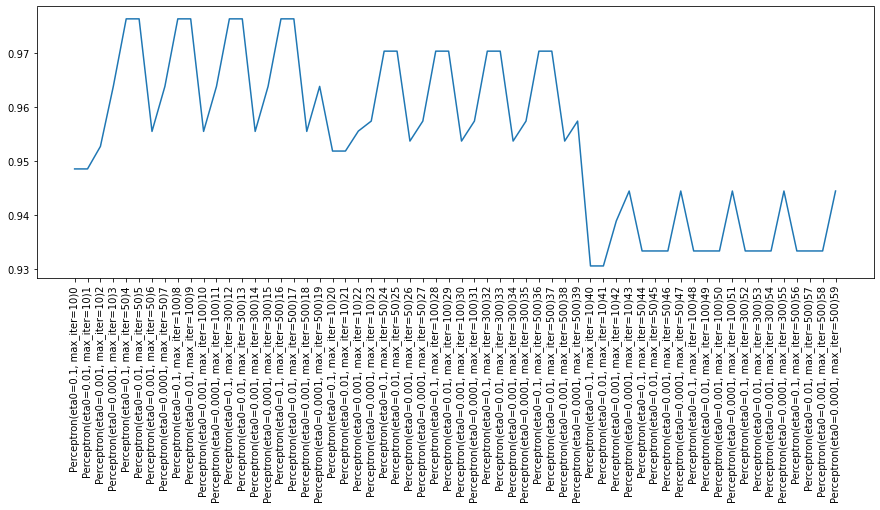

In [232]:
accuracy_list = conf_dict.items()
x, y = zip(*accuracy_list)
plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.xticks(rotation=90, fontsize=10)
plt.show

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [158]:
# import seaborn as sns
# sns.heatmap(conf, annot=True, cmap='YlGnBu', cbar=False)

# plt.show()

In [155]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size = 0.6)

# fit 함수로 Perceptron 학습
p = Perceptron(max_iter = 100, eta0 = 0.001, verbose = 0) # 모델 객체 생성
p.fit(x_train, y_train) # digit 데이터로 모델링 (모델 학습)

res = p.predict(x_test) # 테스트 집합으로 예측 

# 혼동 행렬 
conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('\n테스트 집합에 대한 정확률은 ', accuracy*100,"%입니다.")

[[63.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 69.  0.  0.  1.  0.  1.  0.  7.  0.]
 [ 0.  0. 83.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. 72.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 71.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  3.  0. 74.  0.  0.  4.  1.]
 [ 0.  0.  0.  0.  0.  1. 61.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 66.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 55.  0.]
 [ 0.  0.  0.  1.  0.  3.  0.  2.  4. 70.]]

테스트 집합에 대한 정확률은  95.13212795549374 %입니다.


# 퍼셉트론의 한계

- 선형 분리가 불가능한 데이터에서는 높은 오류율을 보인다
- 은닉층을 추가한 다층 퍼셉트론으로 비선형 확장이 필요하다
  - 퍼셉트론을 하나 더쓰면 XOR 문제를 풀 수 있다

# 다층 퍼셉트론의 구조 

- 입력층, 은닉층, 출력층으로 구성 
  - 층을 연결하는 가중치 뭉치가 두개 있어 3층이 아닌 2층 신경망으로 간주됨

## 3-2. sklearn이 제공하는 숫자 데이터에 다층 퍼셉트론 적용

- 하이퍼 매개변수란 ?
  - 모델의 구조와 모델의 학습 과정을 제어하는 역할 
---

- MLPClassifier 함수의 하이퍼 매개변수
  - hidden_layer_sizes = (100)
    - 100개 노드를 가진 은닉층 한개를 둠 
    - 100개와 80개 노드를 가진 은닉층 두개를 설정하려면 hidden_layer_sizes=(100,80)
  - learning_rate_init = 0.001
    - learning_rate를 0.00로 설정 
  - batch_size = 32
    - 미니 배치 크기를 32로 설정
  - max_iter = 300
    - 최대 반복을 300으로 설정
  - solver = 'sgd'
    - 최적화 알고리즘으로 스토캐스틱 경사 알고리즘을 사용
  - verbose = True

In [2]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size = 0.6)

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes = (100), learning_rate_init = 0.001, batch_size = 32, max_iter = 300, solver = 'sgd', verbose = True) # 모델 객체 생성
mlp.fit(x_train, y_train) # digit 데이터로 모델링 (모델 학습)

res = mlp.predict(x_test) # 테스트 집합으로 예측 

# 혼동 행렬 
conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('\n테스트 집합에 대한 정확률은 ', accuracy*100,"%입니다.")

Iteration 1, loss = 2.22055938
Iteration 2, loss = 0.32964564
Iteration 3, loss = 0.22272273
Iteration 4, loss = 0.17193508
Iteration 5, loss = 0.14861243
Iteration 6, loss = 0.12352630
Iteration 7, loss = 0.10471085
Iteration 8, loss = 0.09178159
Iteration 9, loss = 0.08457326
Iteration 10, loss = 0.07092105
Iteration 11, loss = 0.06455161
Iteration 12, loss = 0.06000481
Iteration 13, loss = 0.05283673
Iteration 14, loss = 0.05026938
Iteration 15, loss = 0.04588563
Iteration 16, loss = 0.04277930
Iteration 17, loss = 0.03979446
Iteration 18, loss = 0.03777048
Iteration 19, loss = 0.03511143
Iteration 20, loss = 0.03365890
Iteration 21, loss = 0.03214888
Iteration 22, loss = 0.03036321
Iteration 23, loss = 0.02901279
Iteration 24, loss = 0.02871513
Iteration 25, loss = 0.02687610
Iteration 26, loss = 0.02469376
Iteration 27, loss = 0.02503157
Iteration 28, loss = 0.02401191
Iteration 29, loss = 0.02194595
Iteration 30, loss = 0.02373433
Iteration 31, loss = 0.02111219
Iteration 32, los

# 4. MNIST 데이터셋으로 확장하기
- MNIST 필기 숫자 데이터셋
  - 훈련 집합 60000자 + 테스트 집합 10000자
  - 샘플은 28*28 맵으로 표현 

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0 # [0,255] 범위를 [0,1] 범위로 변환
x_train = mnist.data[:60000]
x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000])
y_test = np.int16(mnist.target[60000:])

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes = (100), learning_rate_init = 0.001, batch_size = 512, max_iter = 300, solver = 'adam', verbose = True)
mlp.fit(x_train, y_train) # digit 데이터로 모델링 (모델 학습)

# 테스트 집합으로 예측
res = mlp.predict(x_test)  

# 혼동 행렬 
conf = np.zeros((10,10))

for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

# 정확률 계산
no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('\n테스트 집합에 대한 정확률은 ', accuracy*100,"%입니다.")

Iteration 1, loss = 0.62838595
Iteration 2, loss = 0.26737789
Iteration 3, loss = 0.21198174
Iteration 4, loss = 0.17811898
Iteration 5, loss = 0.15395003
Iteration 6, loss = 0.13514445
Iteration 7, loss = 0.11933278
Iteration 8, loss = 0.10697935
Iteration 9, loss = 0.09607583
Iteration 10, loss = 0.08754710
Iteration 11, loss = 0.07871194
Iteration 12, loss = 0.07213644
Iteration 13, loss = 0.06637970
Iteration 14, loss = 0.06066776
Iteration 15, loss = 0.05610347
Iteration 16, loss = 0.05211771
Iteration 17, loss = 0.04812897
Iteration 18, loss = 0.04471605
Iteration 19, loss = 0.04203831
Iteration 20, loss = 0.03827570
Iteration 21, loss = 0.03542483
Iteration 22, loss = 0.03304306
Iteration 23, loss = 0.03065604
Iteration 24, loss = 0.02825335
Iteration 25, loss = 0.02673786
Iteration 26, loss = 0.02522631
Iteration 27, loss = 0.02307002
Iteration 28, loss = 0.02228705
Iteration 29, loss = 0.02048527
Iteration 30, loss = 0.01871350
Iteration 31, loss = 0.01732744
Iteration 32, los

- MLPClassifier는 원래 23개의 매개변수를 가짐 
  - 따로 설정하지 않으면 기본값을 사용 
  - max_iter = 300으로 설정했는데 86에서 학습을 멈춤 
    - 기본 값중 tol = 0.0001과 n_iter_no_change = 10 때문에
    - 10번 동안 손실 함수 감소량이 0.0001 이하면 멈추라는 뜻 

- 하이퍼 매개변수 설정 가이드라인
  - 논문이나 공식 문서를 참고 
  - 라이브러리 함수가 제공하는 기본값 사용
  - 중요한 하이퍼 매개변수를 골라 최적화
